In [176]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Combine the data into a single dataset

# Display the data table for preview

In [177]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [178]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [179]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [180]:
# Combine the data into a single dataset
pyber_df = pd.merge(city_data_df, ride_data_df, on="city")
pyber_df = pyber_df.rename(columns={"city":"City","driver_count":"Driver Count","type":"City Type","date":"Date", 
                                   "fare":"Fare","ride_id":"Ride ID"})
pyber_df.head()

,City,Driver Count,City Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [181]:
#calculating total rides by city 
total_rides = pyber_df['City'].value_counts()
#total_rides

In [182]:
pyber_grouped = pyber_df.groupby(['City'])
#pyber_grouped.count().head()

In [183]:
avg_fare = pyber_grouped["Fare"].mean()
#avg_fare

In [184]:
driver_count = pyber_grouped['Driver Count'].mean()
#driver_count

In [185]:
city_type = pyber_grouped['City Type'].unique()
#city_type

In [186]:
cities_df = pd.DataFrame({"City Type": city_type, 
                          "Average Fare": avg_fare,
                          "Driver Count": driver_count, 
                         "Total Rides": total_rides})
cities_df.iloc[:, 0] = cities_df.iloc[:, 0].str[0].astype(str)
cities_df.head()

,City Type,Average Fare,Driver Count,Total Rides
Amandaburgh,Urban,24.641667,12,18
Barajasview,Urban,25.332273,26,22
Barronchester,Suburban,36.422500,11,16
Bethanyland,Suburban,32.956111,22,18
Bradshawfurt,Rural,40.064000,7,10


Text(0,0.5,'Average Fare')

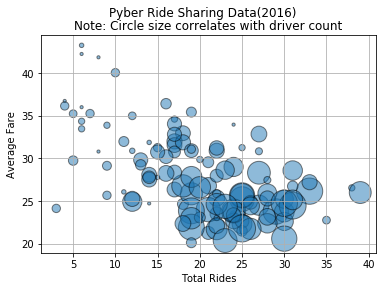

In [189]:
# Obtain the x and y coordinates for each of the three city types
#x-axis = Total Number of Rides, y-axis = average fare note:driver
#count per city should be included as it is needed for circle size 

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

urban = cities_df.loc[cities_df['City Type']== 'Urban'] 
suburban = cities_df.loc[cities_df['City Type']== 'Suburban'] 
rural = cities_df.loc[cities_df['City Type']== 'Rural'] 

colors = ['Gold Light', 'Sky Blue', 'Light Coral'] 

plt.scatter(cities_df['Total Rides'], cities_df['Average Fare'],
            edgecolors='black',
            s=cities_df['Driver Count'] * 10,
            marker='o', alpha=0.5)


plt.suptitle('Pyber Ride Sharing Data(2016)')
plt.title('Note: Circle size correlates with driver count')
plt.grid()
plt.xlabel('Total Rides')
plt.ylabel('Average Fare')


#cities_df.plot(kind='scatter', x='Total Rides',
               #y='Average Fare', marker='o', edgecolors='black',  
               #s=cities_df['Driver Count'] * 10,
               #title='Pyber Ride Sharing Data(2016)',
               #grid=True, alpha=0.5) 

In [196]:
#calculating total fares from original merged DataFrame 
sum_of_rides = pyber_df['Fare'].sum()
sum_of_rides

63538.64

In [194]:
#creating groupby in order to get fare by city
city_type_df = pyber_df.groupby('City Type')
city_type_df.count().head()

,City,Driver Count,Date,Fare,Ride ID
City Type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [199]:
#calculating fares by city by percent 
fares_by_city = city_type_df['Fare'].sum()/sum_of_rides * 100
fares_by_city

City Type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fare, dtype: float64

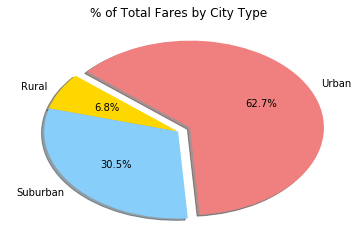

In [218]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(fares_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.savefig('& of Total Fares by City Type Pie Chart') 

In [220]:
total_rides = cities_df['Total Rides'].sum()
total_rides

2375

In [222]:
total_rides_group = cities_df.groupby('City Type')
total_rides_group.count().head() 

,Average Fare,Driver Count,Total Rides
City Type,,,
Rural,18,18,18
Suburban,36,36,36
Urban,66,66,66


In [224]:
total_rides_by_city = total_rides_group['Total Rides'].sum()/total_rides * 100
total_rides_by_city

City Type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: Total Rides, dtype: float64

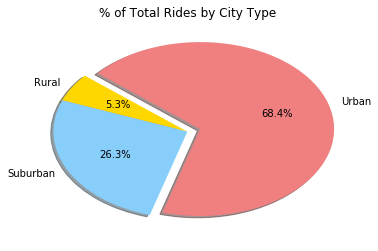

In [227]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(total_rides_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Rides by City Type')
plt.savefig('& of Total Rides by City Type Pie Chart') 

In [229]:
total_drivers = cities_df['Driver Count'].sum()
total_drivers

2973

In [231]:
total_drivers_by_city = total_rides_group['Driver Count'].sum()/total_drivers * 100
total_drivers_by_city

City Type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: Driver Count, dtype: float64

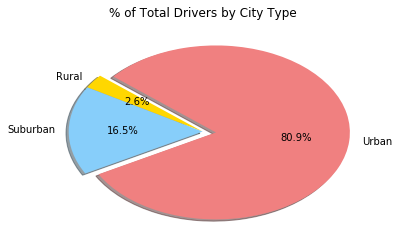

In [232]:
#building piechart 
explode = (0.0, 0.0, 0.1)
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(total_drivers_by_city, autopct="%1.1f%%", labels=labels, shadow=True, startangle=140, explode=explode, colors=colors)
#plt.axis('equal')
plt.title('% of Total Drivers by City Type')
plt.savefig('& of Total Drivers by City Type Pie Chart') 